In [3]:
#Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [6]:
#DataFrame is bos
bos.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [7]:
#As you can see the column names are just numbers, so I am going to replace those numbers with the feature names.
bos.columns=boston.feature_names
bos.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [10]:
#boston.target contains the housing prices.
boston.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [13]:
#I am going to add these target prices to the bos data frame.
bos['PRICE'] = boston.target
bos['PRICE']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [26]:
#In this section I am going to  fit a linear regression model and predict the Boston housing prices. I will use the least squares method as the way to estimate the coefficients.
#Y = boston housing price(also called “target” data in Python)
#and
#X = all the other features (or independent variables)
#First, I am going to import linear regression from sci-kit learn module. Then I am going
#to drop the price column as I want only the parameters as my X values.  I am going to store linear regression object in a variable called lm.
from sklearn.linear_model import LinearRegression
X=bos.drop('PRICE', axis=1)
bos['PRICE'] = boston.target
Y=bos['PRICE']
# This creates a Liners Regression Object
lm=LinearRegression()
lm
#Fittimg a Linear Model
# I am going to use all 13 parameters to fit a linear regression  model.  
#Two other parameters that you can pass to linear regression object are  fit_intercept and normalize.
lm.fit(X, Y)
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
#I am going to print the intercept and number of coefficients
print('Estimated intercept coefficient: ', lm.intercept_)
print('Number of coefficient: ', len(lm.coef_))

Estimated intercept coefficient:  36.491103280361656
Number of coefficient:  13


In [46]:
#I then construct a data frame that contains features and estimated coefficients.
#coef = DataFrame(list(zip(x.columns,np.transpose(log_model.coef_))))
#tb = pd.DataFrame(list(zip(X.columns, np.transpose(lm.coef_)), columns = ['features', 'estimatedcoefficients']))
tb = pd.DataFrame(list(zip(X.columns, np.transpose(lm.coef_))))
tb
tb.columns = ['features', 'estimatedcoefficients']
tb

,features,estimatedcoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


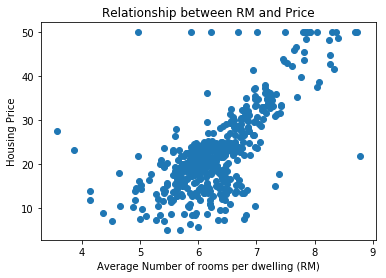

In [48]:
#As you can see from the data frame that there is a high correlation between RM and prices. 
#Lets plot a scatter plot between True housing prices and True RM.
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average Number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
plt.show()

In [ ]:
As you can see that there is a positive correlation between RM and housing prices.

Predicting Prices

I am going to calculate the predicted prices (Y^i)  using lm.predict. 
Then I display the first 5 housing prices. These are my predicted housing prices.


In [49]:
lm.predict(X)[0:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

In [ ]:
Then I plot a scatter plot to compare true prices and the predicted prices.

Text(0.5,1,'Prices vs Predicted Prices: $Y_i$ vs $\\hat{Y}_i$')

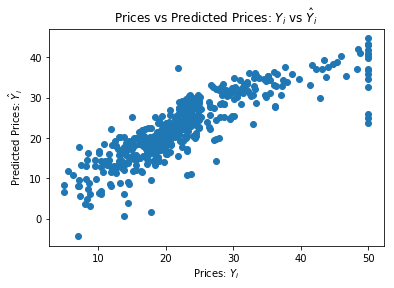

In [50]:
plt.scatter(bos.PRICE, lm.predict(X))
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted Prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")

In [ ]:
You can notice that there is some error in  the prediction as the housing prices increase. 
Lets calculate the mean squared error.

In [51]:
mseFull = np.mean((bos.PRICE - lm.predict(X)) ** 2)
mseFull

21.897779217687475

In [ ]:
for one feature the error will be very high. 
Lets take the feature ‘PTRATIO’ and calculate the mean squared error.

In [52]:
lm = LinearRegression()
lm.fit(X[['PTRATIO']], bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
msePTRATIO = np.mean((bos.PRICE - lm.predict(X[['PTRATIO']])) ** 2)
msePTRATIO

62.65220001376926

In [ ]:
The mean squared error has increased. So this shows that a single feature is not a good predictor of housing prices.